In [3]:
import pandas as pd

# Load the dataset
append_data = pd.read_csv('/Users/rahulscandavadde/Desktop/Vino_Combined/Append-Table 1.csv', encoding='ISO-8859-1')

# Convert the 'Date' column to datetime format
append_data['Date'] = pd.to_datetime(append_data['Date'], errors='coerce')

# Drop rows where 'Date' is NaT (Not a Timestamp - this happens when conversion to datetime fails)
append_data = append_data.dropna(subset=['Date'])

# Extract the month and year from the 'Date'
append_data['Month-Year'] = append_data['Date'].dt.to_period('M')

# Group by 'Winery' and calculate the mean order value
winery_avg_order = append_data.groupby('Winery', as_index=False).agg({"Order Value": "mean"})

# Round the results to two decimal places
winery_avg_order['Order Value'] = winery_avg_order['Order Value'].round(2)

# Sort by 'Order Value'
winery_avg_order_sorted = winery_avg_order.sort_values(by='Order Value', ascending=False)

print(winery_avg_order_sorted)


      Winery  Order Value
1   Pearmund       127.88
0  Effingham       100.77


In [6]:
import pandas as pd

# Load the dataset
append_data = pd.read_csv('/Users/rahulscandavadde/Desktop/Vino_Combined/Append-Table 1.csv', encoding='ISO-8859-1')

# Convert the 'Date' column to datetime format
append_data['Date'] = pd.to_datetime(append_data['Date'], errors='coerce')

# Drop rows where 'Date' is NaT (this happens when conversion to datetime fails)
append_data = append_data.dropna(subset=['Date'])

# Extract the month and year from the 'Date'
append_data['Month-Year'] = append_data['Date'].dt.to_period('M')

# Group by 'Winery', 'Month-Year' and calculate the mean order value
monthly_winery_avg_order = append_data.groupby(['Winery', 'Month-Year'], as_index=False).agg({"Order Value": "mean"})

# Round the results to two decimal places
monthly_winery_avg_order['Order Value'] = monthly_winery_avg_order['Order Value'].round(0)

# Sort the results
monthly_winery_avg_order_sorted = monthly_winery_avg_order.sort_values(by=['Winery', 'Month-Year'])

print(monthly_winery_avg_order_sorted)


       Winery Month-Year  Order Value
0   Effingham    2022-09        136.0
1   Effingham    2022-10        159.0
2   Effingham    2022-11        105.0
3   Effingham    2022-12        117.0
4   Effingham    2023-01        158.0
5   Effingham    2023-02         92.0
6   Effingham    2023-03         73.0
7   Effingham    2023-04         86.0
8   Effingham    2023-05         86.0
9   Effingham    2023-06        154.0
10  Effingham    2023-07         88.0
11  Effingham    2023-08         97.0
12  Effingham    2023-09        105.0
13   Pearmund    2022-09        173.0
14   Pearmund    2022-10        441.0
15   Pearmund    2022-11        133.0
16   Pearmund    2022-12        180.0
17   Pearmund    2023-01        194.0
18   Pearmund    2023-02         85.0
19   Pearmund    2023-03        163.0
20   Pearmund    2023-04        240.0
21   Pearmund    2023-05         89.0
22   Pearmund    2023-06        160.0
23   Pearmund    2023-07        282.0
24   Pearmund    2023-08         83.0


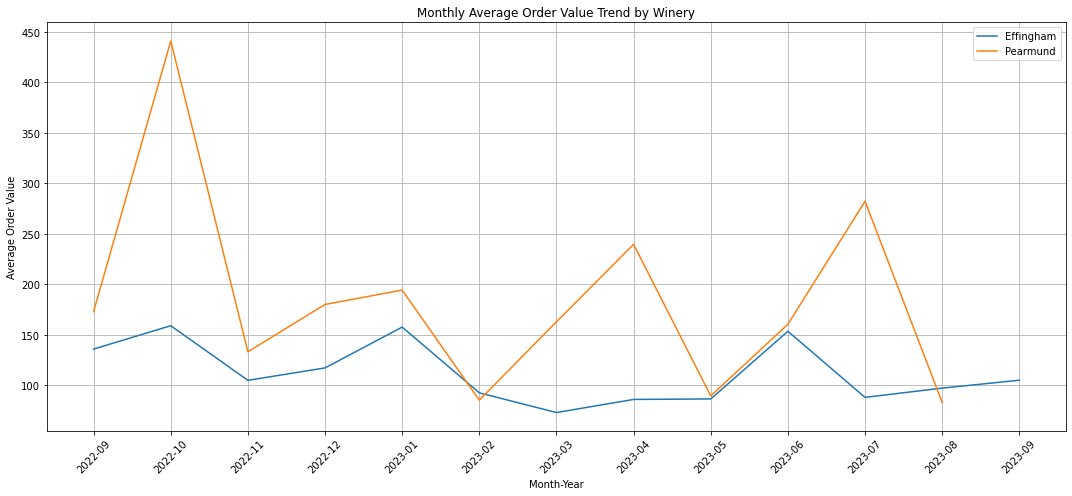

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
append_data = pd.read_csv('/Users/rahulscandavadde/Desktop/Vino_Combined/Append-Table 1.csv', encoding='ISO-8859-1')

# Convert the 'Date' column to datetime format
append_data['Date'] = pd.to_datetime(append_data['Date'], errors='coerce')

# Drop rows where 'Date' is NaT (this happens when conversion to datetime fails)
append_data = append_data.dropna(subset=['Date'])

# Extract the month and year from the 'Date'
append_data['Month-Year'] = append_data['Date'].dt.to_period('M')

# Convert the 'Month-Year' column to string for plotting purposes
append_data['Month-Year'] = append_data['Month-Year'].astype(str)

# Group by 'Winery', 'Month-Year' and calculate the mean order value
monthly_winery_avg_order = append_data.groupby(['Winery', 'Month-Year'], as_index=False).agg({"Order Value": "mean"})

# Round the results to two decimal places
monthly_winery_avg_order['Order Value'] = monthly_winery_avg_order['Order Value'].round(2)

# Plotting
plt.figure(figsize=(15, 7))
for winery in monthly_winery_avg_order['Winery'].unique():
    subset = monthly_winery_avg_order[monthly_winery_avg_order['Winery'] == winery]
    plt.plot(subset['Month-Year'], subset['Order Value'], label=winery)

plt.title('Monthly Average Order Value Trend by Winery')
plt.xlabel('Month-Year')
plt.ylabel('Average Order Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


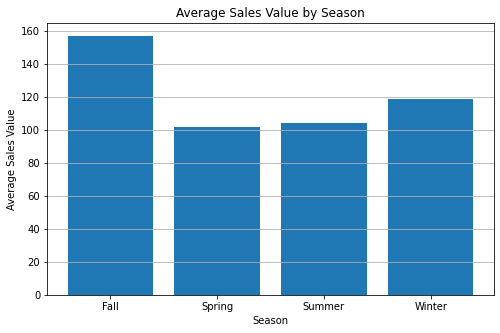

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
append_data = pd.read_csv('/Users/rahulscandavadde/Desktop/Vino_Combined/Append-Table 1.csv', encoding='ISO-8859-1')

# Convert the 'Date' column to datetime format
append_data['Date'] = pd.to_datetime(append_data['Date'], errors='coerce')

# Drop rows where 'Date' is NaT (this happens when conversion to datetime fails)
append_data = append_data.dropna(subset=['Date'])

# Extract the month and year from the 'Date'
append_data['Month'] = append_data['Date'].dt.month

# Define a function to assign seasons based on the month
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the season assignment function to create a 'Season' column
append_data['Season'] = append_data['Month'].apply(assign_season)

# Group by 'Season' and calculate the mean order value
seasonal_avg_order = append_data.groupby('Season', as_index=False)['Order Value'].mean()

# Round the results to two decimal places
seasonal_avg_order['Order Value'] = seasonal_avg_order['Order Value'].round(2)

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(seasonal_avg_order['Season'], seasonal_avg_order['Order Value'])
plt.title('Average Sales Value by Season')
plt.xlabel('Season')
plt.ylabel('Average Sales Value')
plt.grid(axis='y')
plt.show()
